<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Packages" data-toc-modified-id="Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Packages</a></span><ul class="toc-item"><li><span><a href="#Profile:-NFW-&amp;-Hernquist" data-toc-modified-id="Profile:-NFW-&amp;-Hernquist-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Profile: NFW &amp; Hernquist</a></span></li><li><span><a href="#IC:-Jeans-&amp;-Eddington-Inv" data-toc-modified-id="IC:-Jeans-&amp;-Eddington-Inv-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>IC: Jeans &amp; Eddington Inv</a></span></li><li><span><a href="#Statistics" data-toc-modified-id="Statistics-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Statistics</a></span></li></ul></li><li><span><a href="#Density-Profile-and-ICs" data-toc-modified-id="Density-Profile-and-ICs-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Density Profile and ICs</a></span><ul class="toc-item"><li><span><a href="#check-profile-details" data-toc-modified-id="check-profile-details-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>check profile details</a></span><ul class="toc-item"><li><span><a href="#f(E)" data-toc-modified-id="f(E)-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>f(E)</a></span></li><li><span><a href="#Profiles" data-toc-modified-id="Profiles-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Profiles</a></span></li><li><span><a href="#Velocity-Distribution" data-toc-modified-id="Velocity-Distribution-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Velocity Distribution</a></span></li></ul></li><li><span><a href="#Put-ICs-into-Simulation" data-toc-modified-id="Put-ICs-into-Simulation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Put ICs into Simulation</a></span></li><li><span><a href="#With-Jeans-Eq." data-toc-modified-id="With-Jeans-Eq.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>With Jeans Eq.</a></span><ul class="toc-item"><li><span><a href="#Basic-Statistics" data-toc-modified-id="Basic-Statistics-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Basic Statistics</a></span></li><li><span><a href="#Profiles" data-toc-modified-id="Profiles-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Profiles</a></span></li></ul></li></ul></li><li><span><a href="#Effect-of-the-Opening-Criteria" data-toc-modified-id="Effect-of-the-Opening-Criteria-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Effect of the Opening Criteria</a></span></li></ul></div>

## Packages

In [2]:
from Gadget2.IC import IC_generator
from Gadget2.param import Gadget2Param

from nbd_util.profile import NFWProfile, HernquistProfile
from nbd_util.IC import Jeans, EddInv

from nbd_util.units import Units

from myplt import *
import h5py
import os
import astropy.units as u
import astropy.constants as const

In [3]:
units = Units()

units: L=3.085677581467192e+21 cm (1.0000000000000002 kpc), 
	M=1.988409870698051e+43 g (10000000000.0 solMass), 
	V=100000.0 cm / s (1.0 km / s), 
	T=3.085677581467192e+16 s (0.9777922216731285 Gyr)
consts: G=43009.17270069977, Msun=1e-10


In [4]:
leg_fmt = dict(fontsize=16, frameon=False, labelspacing=0.)

### Profile: NFW & Hernquist

In [5]:
mass = 1.0e2
rs = 10.0
rvir = 15.0*rs
rt=1.2*rvir
r0 = 1.0e-5*rs
rcore=1.0e-4*rs

nfws = [ NFWProfile(mass, rs, rvir=rvir, rt=rt, rw=fr*rs, rcore=rcore, r0=r0)\
        for fr in (2.0, 10.0, 30.0) ]
hernqs = [ HernquistProfile( mass, rs, rvir=rvir, rt=rt, rw=fr*rs, rcore=rcore, r0=r0)\
        for fr in (2.0, 10.0, 30.0) ]

units: L=3.085677581467192e+21 cm (1.0000000000000002 kpc), 
	M=1.988409870698051e+43 g (10000000000.0 solMass), 
	V=100000.0 cm / s (1.0 km / s), 
	T=3.085677581467192e+16 s (0.9777922216731285 Gyr)
consts: G=43009.17270069977, Msun=1e-10
NFW Profile: Interp begins ...
  Interp for M done, IM = [3.098e-12...1.938]
  Interp for V done, IV = [0.0001177...0.8355]
  Interp for sigma done, Isigma = [3.147...0]
  Interp for fE done, xE = [-4.593...-0.1678], xInt = [14.82...0]
units: L=3.085677581467192e+21 cm (1.0000000000000002 kpc), 
	M=1.988409870698051e+43 g (10000000000.0 solMass), 
	V=100000.0 cm / s (1.0 km / s), 
	T=3.085677581467192e+16 s (0.9777922216731285 Gyr)
consts: G=43009.17270069977, Msun=1e-10
NFW Profile: Interp begins ...
  Interp for M done, IM = [3.065e-12...1.611]
  Interp for V done, IV = [0.0001164...0.8117]
  Interp for sigma done, Isigma = [3.077...0]
  Interp for fE done, xE = [-4.594...-0.1964], xInt = [14.82...0]
units: L=3.085677581467192e+21 cm (1.00000000000

### IC: Jeans & Eddington Inv

In [6]:
pf = nfws[1]
EddInv(pf).get(100000)
pf = hernqs[1]
EddInv(pf).get(100000)

Begins to chunk implementation for 24 samples... finish
	range: pos=149.389, vel=552.857, m_part=0.001, sampl. rate=0.153597
Begins to chunk implementation for 24 samples... finish
	range: pos=147.514, vel=802.678, m_part=0.001, sampl. rate=0.132229


(array([[  2.42857701, -11.08775858,   1.70380065],
        [-51.21683764,   2.60419515,  -9.50009901],
        [ 23.18358145,  45.9339274 , -13.19233933],
        ...,
        [ -9.69722681,  -0.91244345,  -5.74388113],
        [ -1.59307543,   2.43944046,  -2.84461402],
        [-11.60634051, -15.1576348 ,   8.42516453]]),
 array([[-183.96219874, -309.61149849,  169.81440641],
        [  41.26055412,  -28.72664259,  -13.62267389],
        [ 111.48124158,   91.58279296, -137.56250754],
        ...,
        [ 222.84895963,  157.35747397,   -8.82656756],
        [-221.13194314,  -57.95813649, -315.75713207],
        [ 115.30466708, -288.40378346,   16.51131239]]),
 0.0010000000000000002)

### Statistics

In [231]:
class SnapMeasure:
    def __init__(self, x, v, profile=None):
        r = np.linalg.norm( x, axis=1 )
        self._tags = { 
            'x': np.array(x), 'v': np.array(v), 'r':r, 
            'm_part': pf['mass']/len(x), 'profile': pf }
        self._find_stats()
    def __getitem__(self, key):
        return self._tags[key]
    def _find_stats(self, n_bins=15):
        pf = self['profile']
        r0, rvir = pf['r0'], pf['rvir']
        x0, xvir = np.log10(r0), np.log10(rvir)
        r_bins = np.logspace( x0, xvir, n_bins+1 )
        rvals, rhos, sigmas2, Ms, Vs = [], [], [], [], []
        for i in range(n_bins):
            r1, r2 = r_bins[i], r_bins[i+1]
            sel = (self['r']>=r1) & (self['r']<r2)
            n_sel = sel.sum()
            if n_sel == 0:
                rvals.append((r1+r2)/2.)
                rhos.append(0.)
                sigmas2.append(0.)
            else:
                vol = 4./3.*np.pi*(np.power(r2, 3)-np.power(r1,3))
                rhos.append( n_sel*self['m_part']/vol )
                v = self['v'][sel]
                dv = v - v.mean(axis=0)
                sigmas2.append(np.mean(np.linalg.norm(dv, axis=1)**2))
                rvals.append( self['r'][sel].mean() )
            reff = self['r'] + 0.
            reff[self['r'] < rvals[-1]] = rvals[-1] 
            V = - pf['G'] * (self['m_part'] / reff).sum()
            Vs.append(V)
            Ms.append( (self['r'] <= rvals[-1]).sum()*self['m_part'] )
        self._tags.update({'V': np.array(Vs), 'rval': np.array(rvals),
            'M': np.array(Ms), 'rho': np.array(rhos), 'sigma2': np.array(sigmas2)})
    def find_vprof(self, radii=[0.1, 0.5, 1, 2, 5, 10], bins=15, v_range=(0., 2)):
        pf = self['profile']
        rs, vs = pf['rs'], np.sqrt( pf['Vs'] )
        es, hs = [], []
        for radius in radii:
            r1, r2 = 0.9*radius*rs, 1.1*radius*rs
            sel = ( self['r'] >= r1 ) & ( self['r'] < r2 ) 
            v = np.linalg.norm(self['v'][sel], axis=1) / vs
            h, e = np.histogram( v, range=v_range, bins=bins )
            step = e[1] - e[0]
            h = h/(h.sum()*step)
            es.append( e[:-1]+step/2.0 )
            hs.append( h )
        return radii, es, hs
        
def mean_sd(dsets, key):
    v = np.array([ dset[key] for dset in dsets ], dtype=float)
    return np.array([v.mean(axis=0), np.std(v,axis=0)])

## Density Profile and ICs

In [264]:
sts_rs = []

for ir in 0,1,2:
    pf = nfws[ir]
    n = 1000000

    sts_jeans = []
    for i in range(10):
        pos, vel, m = Jeans(pf).get(n)
        sts_jeans.append( SnapMeasure(pos, vel, nfw) )
        
    sts_edd = []
    for i in range(10):
        pos, vel, m = EddInv(pf).get(n)
        sts_edd.append(SnapMeasure(pos, vel, nfw))
        
    sts_rs.append( (sts_jeans, sts_edd) )

range: pos=149.927, vel=692.923, m_part=0.0001, sampl. rate=1
range: pos=149.892, vel=836.407, m_part=0.0001, sampl. rate=1
range: pos=149.947, vel=695.958, m_part=0.0001, sampl. rate=1
range: pos=149.884, vel=712.759, m_part=0.0001, sampl. rate=1
range: pos=149.931, vel=693.924, m_part=0.0001, sampl. rate=1
range: pos=149.722, vel=709.497, m_part=0.0001, sampl. rate=1
range: pos=149.874, vel=707.631, m_part=0.0001, sampl. rate=1
range: pos=149.862, vel=802.593, m_part=0.0001, sampl. rate=1
range: pos=149.8, vel=738.997, m_part=0.0001, sampl. rate=1
range: pos=149.765, vel=711.923, m_part=0.0001, sampl. rate=1
Begins to chunk implementation for 203 samples... finish
	range: pos=149.964, vel=576.149, m_part=0.0001, sampl. rate=0.167158
Begins to chunk implementation for 204 samples... finish
	range: pos=149.803, vel=554.833, m_part=0.0001, sampl. rate=0.167628
Begins to chunk implementation for 204 samples... finish
	range: pos=149.861, vel=577.267, m_part=0.0001, sampl. rate=0.15312
Be

### check profile details

#### f(E)

radius range= 0.0001 180.0
radius range= 0.0001 180.0
radius range= 0.0001 180.0
radius range= 0.0001 180.0
radius range= 0.0001 180.0
radius range= 0.0001 180.0


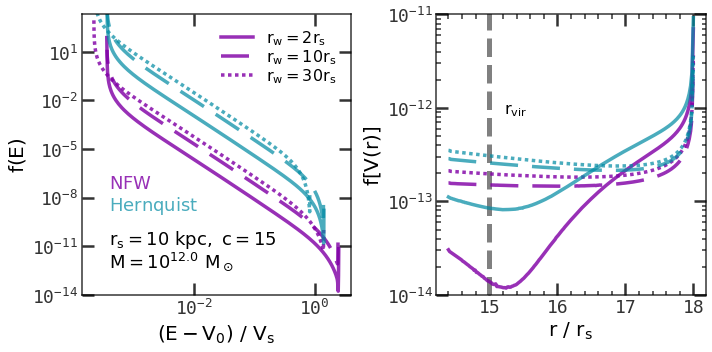

In [284]:
_, axs = m_get_figure((10,5), 1, 2)
axs = axs[0]

labs_pf = [r'NFW(+erf)', r'Hernquist(+erf)']
labs_r = [r'r_w=2r_s',r'r_w=10r_s',r'r_w=30r_s']
lss = ['-', (0,(8,4)), (0,(1,1)) ]

for ipfs, pfs in enumerate([nfws, hernqs]):
    for ir in 0,1,2:
        pf = pfs[ir]
        r1, r2, rvir, rs = pf['r0'], pf['rt'], pf['rvir'], pf['rs']
        x1, x2, xvir = r1/rs, r2/rs, rvir/rs
        print('radius range=', r1, r2)
    
        off = 10.0**(( ipfs*1.5 + ir*0.5 )*2)
        # theory
        ax = axs[0]
        r = np.logspace( np.log10(x1), np.log10(x2), 200) * rs
        V = (pf.V( r )-pf['V0'])/( pf['Vs'] )
        fE = pf.fE( pf.V(r) )*off
        lab = {} if ipfs != 0 else {'label': r'$\rm %s$'%(labs_r[ir])}
        ax.plot( V, fE, lw=3.5, c=mycms2[2+ipfs], ls=lss[ir], **lab )

        off = 10.0**(( ipfs*1.5 + ir*0.5 )*.5)
        ax = axs[1]
        r = np.logspace( np.log10(0.8*x2), np.log10(x2), 200) * rs
        fE = pf.fE( pf.V(r) )*off
        ax.plot( r/rs, fE, lw=3.5, c=mycms2[2+ipfs], ls=lss[ir] )
        
axs[1].vlines( [xvir], 1.0e-14, 5.0e-11, color='gray', ls='--', lw=5. )
    
ax = axs[0]
m_set_lim(ax,y=[1.0e-14, 2.0e3])
m_set_label(ax, r'$\rm (E-V_0)\ /\ V_s$', r'$\rm f(E)$')
m_set_scale( ax, 'log', 'log' )    
txposs( ax, [r'$\rm r_s=10\ kpc,\ c=15$', r'$\rm M=10^{12.0}\ M_\odot$'], (.1, .2), (0. -.08), 'k', 18 )
txposs( ax, [r'$\rm NFW$', r'$\rm Hernquist$'], 
       (.1, .4), (0. -.08), (mycms2[2], mycms2[3]), 18 )
ax.legend(loc='upper right', **leg_fmt)

ax = axs[1]
m_set_lim(ax,y=[1.0e-14, 1.0e-11])
m_set_label(ax, r'$\rm r\ /\ r_s$', r'$\rm f[V(r)]$')
m_set_scale( ax, y='log' )
txpos(ax, r'$\rm r_{vir}$', (.25, .66), 'k', 16)

plt.tight_layout()
plt.savefig('output/profile_recipe_fE_divergence.pdf')
plt.show()

#### Profiles

In [261]:
efmt = dict(capthick=1., capsize=9, elinewidth=1.5,
        lw=3., marker='o', markersize=12, markerfacecolor='none', markeredgewidth=1.5)

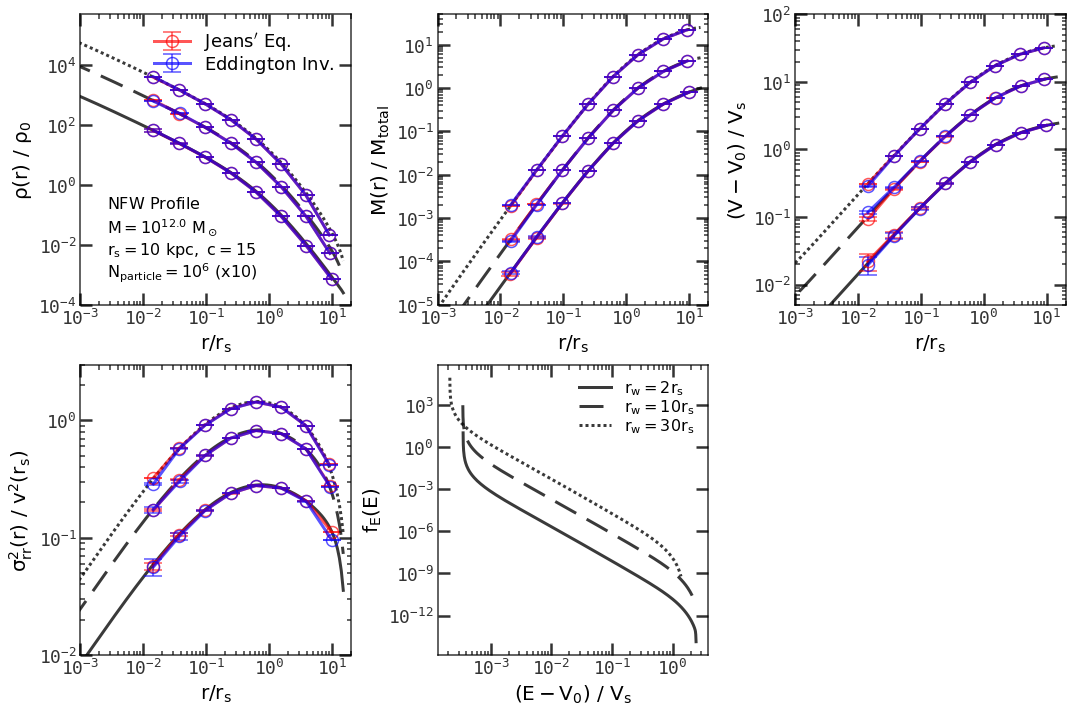

In [285]:
_, axs = m_get_figure((15, 10), 2, 3)
axs = axs[0] + axs[1]


lims = [[1.0e-4, 5.0e5], [1.0e-5, 5.0e1], [5.0e-3, 1.0e2], [0.01, 3]]
ylabs = [ r'$\rm \rho(r)\ /\ \rho_0$', r'$\rm M(r)\ /\ M_{total} $', 
        r'$\rm (V-V_0)\ /\ V_s $', r'$\rm \sigma_{rr}^2(r)\ /\ v^2(r_s) $' ]
offs = [ 1.0e1, 0.5e1, 0.5e1, 0.3e1, 1.0e2 ]

mlabs = [r"$\rm Jeans'\ Eq.$", r'$\rm Eddington\ Inv.$']
labs_r = [r'r_w=2r_s',r'r_w=10r_s',r'r_w=30r_s']
lss = ['-', (0,(8,4)), (0,(1,1)) ]


for ir in 0,1,2:
    pf = nfws[ir]
    sts_jeans, sts_edd = sts_rs[ir]

    x1, x2 = pf['x0'], pf['xvir']
    rs, vel_s, Vs, V0 = pf['rs'], np.sqrt(pf['Vs']), pf['Vs'], pf['V0']
    mass, rho0 = pf['mass'], pf['rho0']

    # theory
    r = np.logspace( np.log10(x1), np.log10(x2), 200) * rs
    rho = pf.rho( r ) / rho0
    M = pf.M( r ) / mass
    V = (pf.V( r ) - V0) / Vs
    sigma2 = pf.sigma2( r ) / vel_s**2
    fE = pf.fE( pf.V(r) )

    for i,d in enumerate([rho, M, V, sigma2]):
        ax = axs[i]
        ax.plot( r/rs, np.abs(d) * offs[i]**ir, c=mycms2_r[0], lw=3., ls=lss[ir] )
        m_set_lim(ax, [1.0e-3, 20], lims[i])
    axs[4].plot( V, fE* offs[4]**ir, c=mycms2_r[0], lw=3., ls=lss[ir], label=r'$\rm %s$'%(labs_r[ir]) )
    
    # randoms
    for ist, sts in enumerate([sts_jeans, sts_edd]):
        r, _  = mean_sd(sts, 'rval')/rs
        sel = r>1.0e-2
        rho, rho_e = mean_sd(sts, 'rho')/rho0
        llab = {} if ir != 0 else {'label': mlabs[ist]}
        axs[0].errorbar(r[sel], rho[sel]*offs[0]**ir, yerr=rho_e[sel], **efmt, c=mycms2[ist], **llab)
        M, M_e = mean_sd(sts, 'M')/mass
        axs[1].errorbar(r[sel], M[sel]*offs[1]**ir, yerr=M_e[sel], **efmt, c=mycms2[ist])
        V, V_e = mean_sd(sts, 'V')
        V_e = V_e/Vs
        V = (V-V0)/Vs
        V_theory = (pf.V(r*rs) - V0)/Vs
        V = V + V_theory[-1] - V[-1]
        axs[2].errorbar(r[sel], V[sel]*offs[2]**ir, yerr=V_e[sel], **efmt, c=mycms2[ist])
        s2, s2_e = mean_sd(sts, 'sigma2') / 3. / vel_s**2
        axs[3].errorbar(r[sel], s2[sel]*offs[3]**ir, yerr=s2_e[sel], **efmt, c=mycms2[ist])

    
axs[0].legend(loc='upper right', fontsize=18, frameon=False, labelspacing=0.)
txposs( axs[0], [r'$\rm NFW\ Profile$', 
        r'$\rm M=10^{12.0}\ M_\odot$', 
        r'$\rm r_s=10\ kpc,\ c=15$', \
        r'$\rm N_{particle}=10^6\ (x10)$'], (.1, .35), (0. -.08), 'k' )
for ax in axs:
    m_set_scale(ax,'log', 'log')
axs[4].legend( loc='upper right', **leg_fmt )
axs[5].set_axis_off()
for i in range(4):
    m_set_label(axs[i], r'$\rm r/r_s$', ylabs[i])
m_set_label(axs[4], r'$\rm (E-V_0)\ /\ V_s$', r'$\rm f_E(E)$')
    
    
plt.tight_layout()
plt.savefig('output/profile_recipe_statistics.pdf')
plt.show()

#### Velocity Distribution

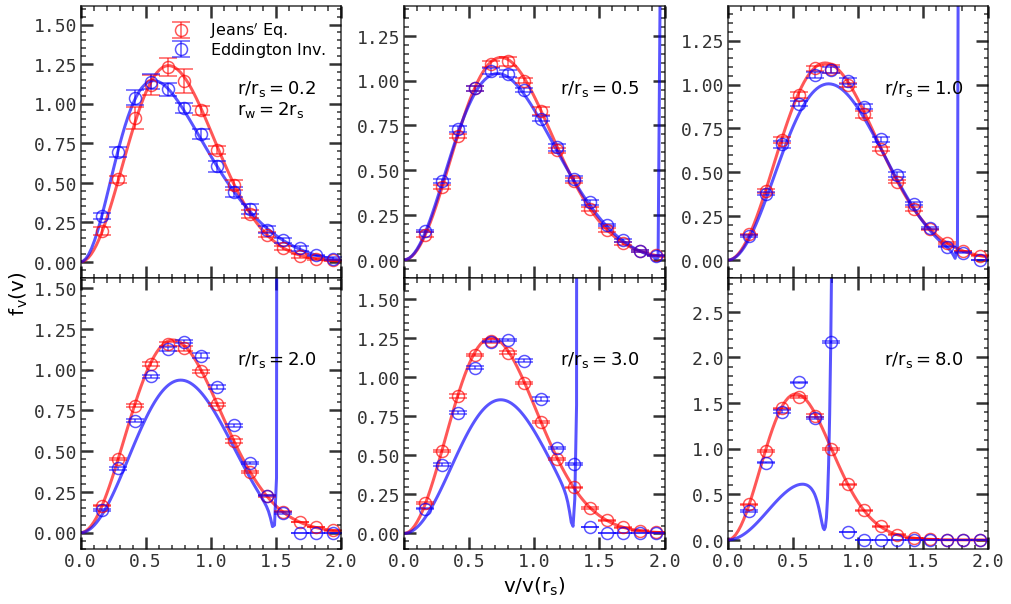

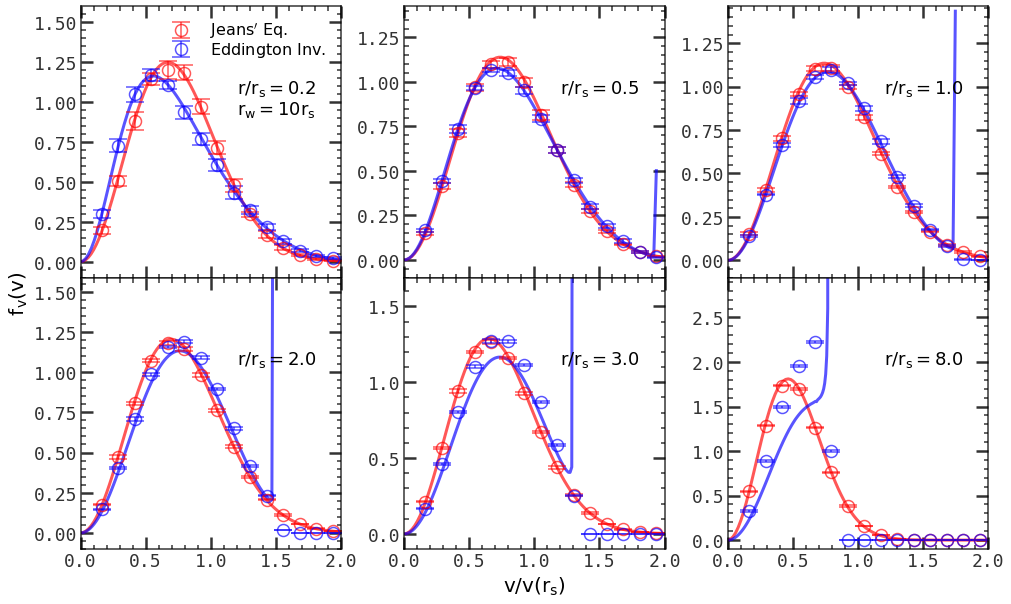

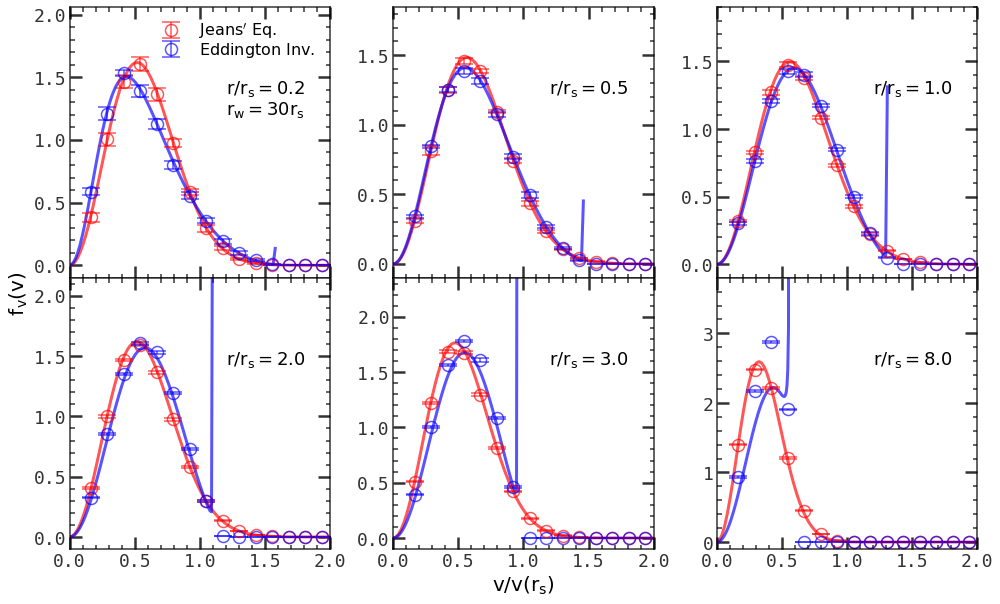

In [355]:
for irw in 0,1,2:
    pf = nfws[irw]
    eddinv = EddInv(pf)
    sts_jeans, sts_edd = sts_rs[irw]
    lab_r = [r'r_w=2r_s',r'r_w=10r_s',r'r_w=30r_s'][irw]

    fig, axs = plt.subplots( 2, 3, figsize=(14,8.5), sharex=True, gridspec_kw={'hspace':0.} )
    axs = axs.flat

    x1, x2 = pf['x0'], pf['xvir']
    rs, vel_s, Vs, V0 = pf['rs'], np.sqrt(pf['Vs']), pf['Vs'], pf['V0']
    mass, rho0 = pf['mass'], pf['rho0']

    xrs = np.array( [0.2, 0.5, 1, 2, 3., 8.] )
    pf_jeans = [ SnapMeasure( st['x'], st['v'], pf ).find_vprof(radii=xrs, v_range=(0.1, 2.0)) for st in sts_jeans ]
    pf_edd = [ SnapMeasure( st['x'], st['v'], pf ).find_vprof(radii=xrs, v_range=(0.1, 2.0)) for st in sts_edd ]

    for ir, xr in enumerate(xrs):
        ax = axs[ir]    
        r =  xr*rs

        sigma = np.sqrt(pf.sigma2( r ))
        v = np.linspace( 0., 2.0*vel_s, 100 )
        rv = stats.norm(scale=sigma)
        fE = rv.pdf( v )*4.0*np.pi*v*v
        fE /= fE.sum()*(2.0*vel_s/100/vel_s)
        ax.plot( v/vel_s, fE, c=mycms2[0], lw=3. )

        V = pf.V( r )
        vmax = eddinv.vmax( np.array([V]) )
        v = np.linspace( 0., vmax, 100 )
        fE = pf.fE( V + 0.5*v*v )*4.0*np.pi*v*v
        fE /= fE.sum()*(vmax/100/vel_s)
        ax.plot( v/vel_s, fE, c=mycms2[1], lw=3. )

        e = pf_jeans[0][1][ir]
        h = np.array([ h[ir] for r,e,h in pf_jeans])
        ax.errorbar( e, h.mean(axis=0), yerr=np.std(h, axis=0), 
                    **efmt, color=mycms2[0], fmt='o', label=r"$\rm Jeans'\ Eq.$" )

        e = pf_edd[0][1][ir]
        h = np.array([ h[ir] for r,e,h in pf_edd])
        ax.errorbar( e, h.mean(axis=0), yerr=np.std(h, axis=0), 
                    **efmt, color=mycms2[1], fmt='o', label=r'$\rm Eddington\ Inv.$' )

        txpos(ax, r'$\rm r/r_s=%.1f$'%xr, (.6, .7), 'k', 18)
        m_set_lim(ax, [0, 2], y=[-.1, h.max()*1.31])

    txpos(axs[0], r'$\rm %s$'%(lab_r), (.6, .62), 'k', 18)
    m_set_label(axs[3], y=' '*20+r'$\rm f_v(v)$')
    m_set_label(axs[4], r'$\rm v/v(r_s)$')
    axs[0].legend(loc='upper right', **leg_fmt)
    plt.tight_layout()

    plt.savefig('output/compare_recipe_vprofile.r%d.pdf'%(irw))
    plt.show()

### Put ICs into Simulation

In [293]:
ir = 1
ist = 0

sts_jeans, sts_edd = sts_rs[ir]

st = sts_jeans[ist]
IC_generator('./run_jeans_eq/IC.hdf5', st['x'], st['v'], st['m_part'])

st = sts_edd[ist]
IC_generator('./run_eddington_inv/IC.hdf5', st['x'], st['v'], st['m_part'])

In [300]:
class DumpedSet:
    def __init__(self, fname):
        f = h5py.File(fname, 'r')
        pos = np.array(f['PartType1/Coordinates'])
        vel = np.array(f['PartType1/Velocities'])
        V = np.array(f['PartType1/Potential'])
        t = f['Header'].attrs['Time']
        npart = f['Header'].attrs['NumPart_ThisFile'][1]
        
        T = np.sum(vel * vel, axis=1) / 2.0
        r = np.sqrt(np.sum(pos * pos, axis=1))
        
        virial_ratio = -2.0 * T.sum() / ( V.sum()*0.5 )
        q = (0.01, .1, .25, .5, .75, .9, .98)
        r_quantile = np.quantile( r, q )
        E = T.sum() + V.sum()*0.5
        
        COM = pos.mean(axis=0)
        pos_rel = pos - COM
        r_COM = np.sqrt( np.sum(COM*COM) )
        
        vel_COM = vel.mean(axis=0)
        vel_rel = vel - vel_COM
        v_COM = np.sqrt( np.sum(vel_COM*vel_COM) )
        
        L = np.cross( pos_rel, vel_rel ).sum( axis=0 )
        L_COM = np.sqrt( np.sum(L*L) )
        
        
        self.stats = {'-2T/V': virial_ratio, 'q': q, 'r_quantile': r_quantile, 
                'E': E, 't':t, 'npart': npart, 
                'r_COM': r_COM, 'v_COM': v_COM, 'L_COM': L_COM, 'L_COM_vec': L,
                'r_COM_vec': COM, 'v_COM_vec': vel_COM}
    def get_stats(self, tag):
        return self.stats[tag]
    
class DumpedSets:
    def __init__(self, fbase, nfiles, rs = 10.0, units = Units()):
        ts = []
        Es = []
        qs = []
        r_quantiles = []
        virial_ratios = []
        xs, xs_vec = [], []
        vs, vs_vec = [], []
        Ls, Ls_vec = [], []
        npart = None
        for i in range(nfiles):
            d = DumpedSet(fbase + '/snapshot_%.3d.hdf5'%i)
            t, E, q, r_q, virial = d.stats['t'], d.stats['E'], d.stats['q'], d.stats['r_quantile'], d.stats['-2T/V']
            x, v, L = d.stats['r_COM'], d.stats['v_COM'], d.stats['L_COM']
            x_vec, v_vec, L_vec = d.stats['r_COM_vec'], d.stats['v_COM_vec'], d.stats['L_COM_vec']
            ts.append( (t*units.uT/u.Gyr).to(1).value )
            Es.append(E)
            qs.append(q)
            r_quantiles.append(r_q / rs)
            virial_ratios.append(virial)
            xs.append(x); xs_vec.append(x_vec)
            vs.append(v); vs_vec.append(v_vec)
            Ls.append(L); Ls_vec.append(L_vec)
            
            npart = d.stats['npart']
        self.stats = {'-2T/V': virial_ratios, 'q': qs, 'r_quantile': r_quantiles, 
                'E': Es, 't':ts, 'npart':npart, 'x': xs, 'v':vs, 'L':Ls,
                'x_vec':np.array(xs_vec), 'v_vec':np.array(vs_vec), 'L_vec':np.array(Ls_vec)}

units: L=3.085677581467192e+21 cm (1.0000000000000002 kpc), 
	M=1.9884754153381439e+43 g (10000000000.0 solMass), 
	V=100000.0 cm / s (1.0 km / s), 
	T=3.085677581467192e+16 s (0.9777922216731285 Gyr)
consts: G=43009.17270069976, Msun=9.999999999999999e-11


### With Jeans Eq.

#### Basic Statistics

In [323]:
dsets_rs = []
for ir in 0,1,2:
    dsets_jeans = DumpedSets('./run_jeans_eq/run%d/output/'%ir, 42).stats
    dsets_edd = DumpedSets('./run_eddington_inv/run%d/output/'%ir, 42).stats
    dsets_rs.append( (dsets_jeans, dsets_edd) )

/home/yangyao/soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


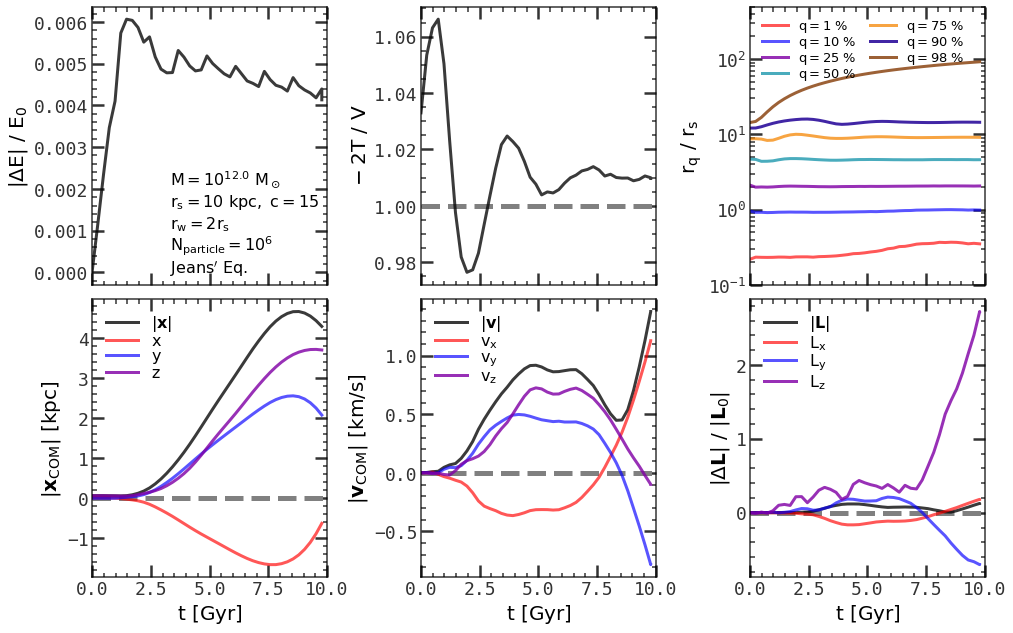

/home/yangyao/soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


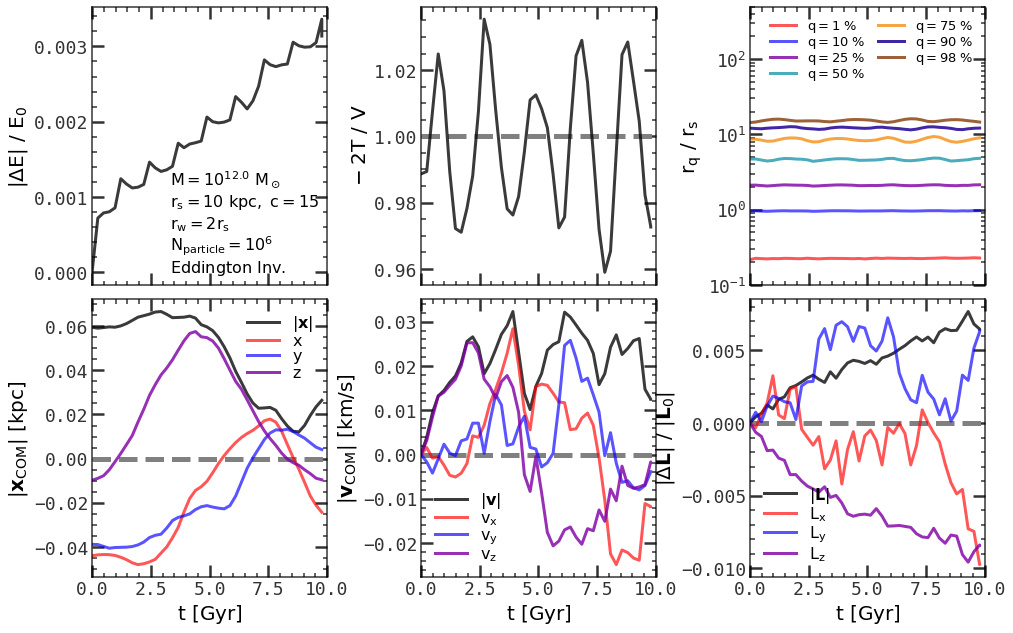

/home/yangyao/soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


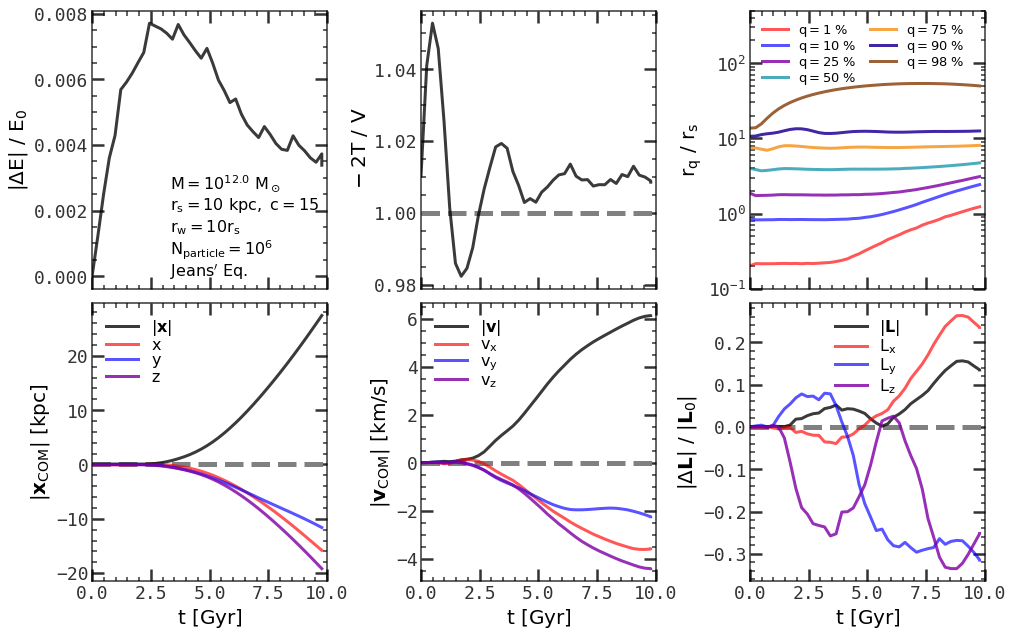

/home/yangyao/soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


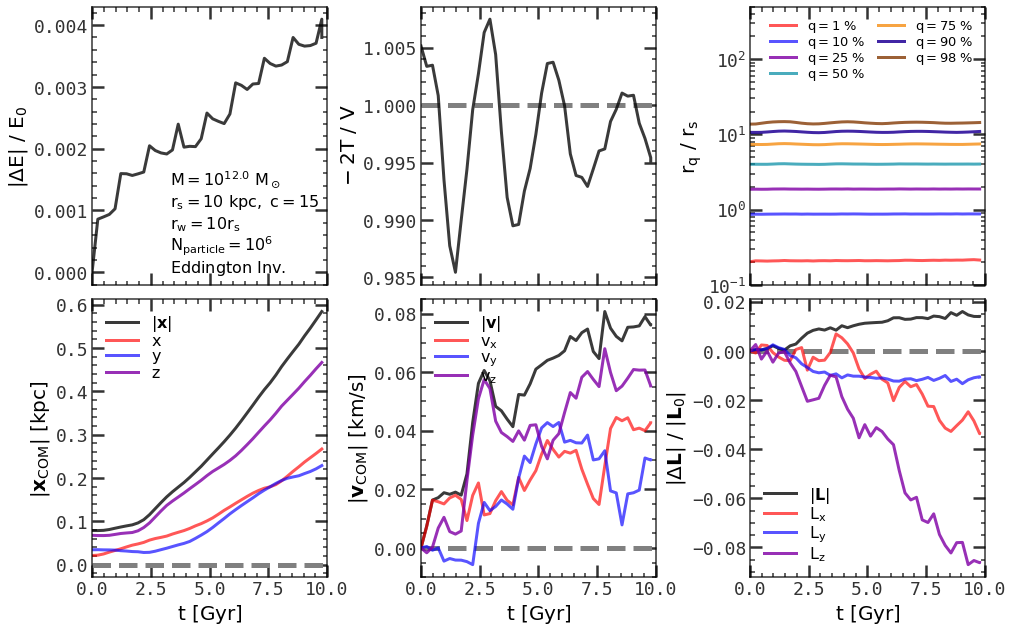

/home/yangyao/soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


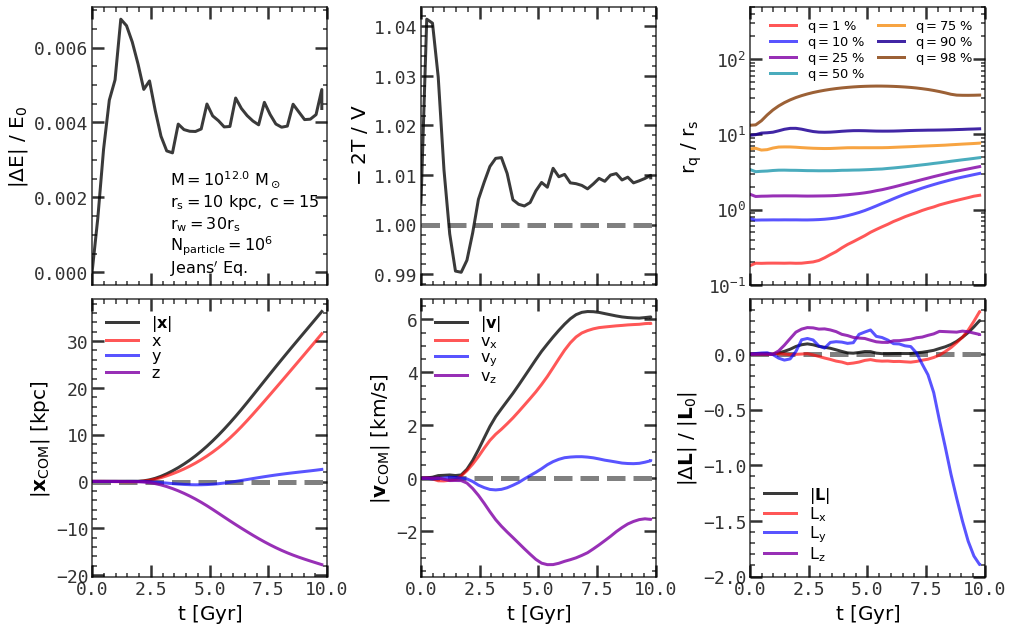

/home/yangyao/soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


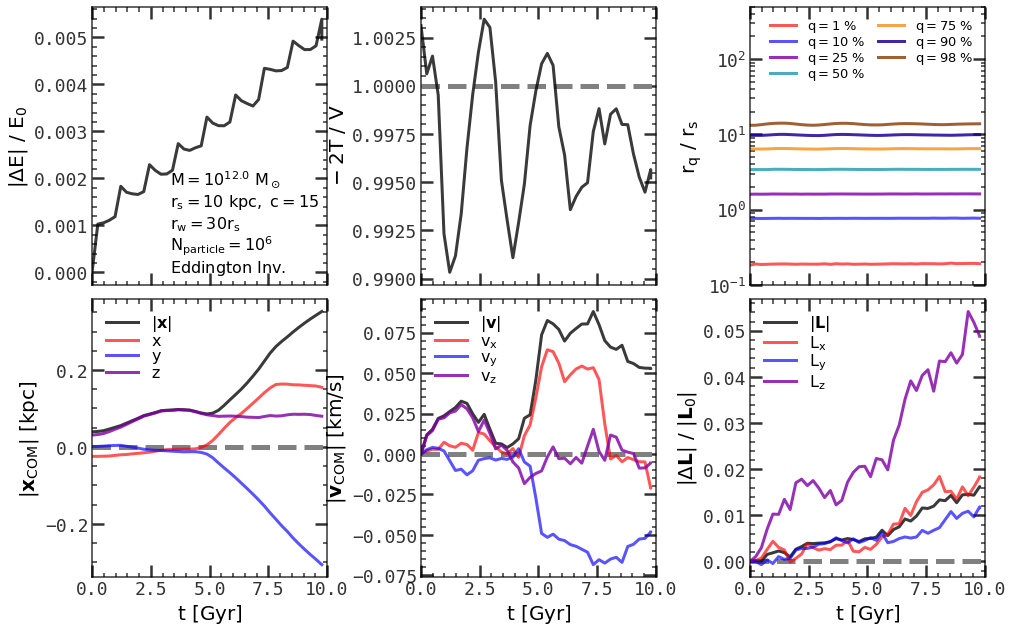

In [326]:
labs_r = [r'r_w=2r_s',r'r_w=10r_s',r'r_w=30r_s']
labels = [ r"$\rm Jeans'\ Eq.$", r'$\rm Eddington\ Inv.$']
x_lim = [0, 10]
y_labs = [ r'|\Delta E|\ /\ E_0', r'-2T\ /\ V', r'r_{q}\ /\ r_s', 
          r'|{\bf x}_{COM}|\ [kpc]', r'|{\bf v}_{COM}|\ [km/s]', r'|\Delta{\bf L}|\ /\ |{\bf L}_0|' ]
x_lab = r't\ [Gyr]'

for ir in 0,1,2:
    dsets_jeans, dsets_edd = dsets_rs[ ir ]
    outs = ['output/measure_stats_jeans_r%d.pdf'%ir, 'output/measure_stats_edd_r%d.pdf'%ir]

    for idset, dset in enumerate([ dsets_jeans, dsets_edd ]) :
        fig, axs = plt.subplots( 2, 3, figsize=(16, 10.5), gridspec_kw = { 'hspace':.05, 'wspace': .4 } )
        axs = axs.flat

        Nsamples = dset['npart']
        t = dset['t']
        E = np.abs( dset['E'] )
        virial = dset['-2T/V']
        q = dset['q'][0]
        r_q = np.array(dset['r_quantile']).T
        x_com,v_com, L = dset['x'], dset['v'], dset['L']
        x_v,v_v, L_v = dset['x_vec'], dset['v_vec'], dset['L_vec']

        ax = axs[0]
        dE = np.abs(E - E[0])/E[0]
        ax.plot( t, dE, c=mycms2[-1] )

        ax = axs[1]
        ax.plot( t, virial, c=mycms2[-1] )

        ax = axs[2]
        for i in range(len(r_q)):
            ax.plot( t, r_q[i], c=mycms2[i], label=r'$\rm q = %.0f\ \%%$'%( q[i]*100 ) )
        ax.legend(loc='best', ncol=2, labelspacing=0, columnspacing=1., frameon=False, fontsize=13)
        m_set_scale(ax, y='log')

        ax = axs[3]
        ax.plot( t, x_com, c=mycms2[-1], label=r'$\rm |{\bf x}|$' )
        for i in range(3):
            lab_coord = ['x', 'y', 'z'][i]
            ax.plot( t, x_v[:, i], c=mycms2[i], label=r'$\rm %s$'%( lab_coord ) )


        ax = axs[4]
        ax.plot( t, v_com, c=mycms2[-1], label=r'$\rm |{\bf v}|$' )
        for i in range(3):
            lab_coord = ['x', 'y', 'z'][i]
            ax.plot( t, v_v[:, i], c=mycms2[i], lw=3., label=r'$\rm v_%s$'%( lab_coord ) )

        ax = axs[5]
        dL = np.abs( L - L[0] ) / np.abs(L[0])
        ax.plot( t, dL, c=mycms2[-1], label=r'$\rm |{\bf L}|$' )
        for i in range(3):
            lab_coord = ['x', 'y', 'z'][i]
            Li0 = L_v[0, i]
            dLi = (L_v[:, i] - Li0) / Li0
            ax.plot( t, dLi, c=mycms2[i], lw=3., label=r'$\rm L_%s$'%( lab_coord ) )


        txposs( axs[0], [ r'$\rm M=10^{12.0}\ M_\odot$', 
                r'$\rm r_s=10\ kpc,\ c=15$', r'$\rm %s$'%( labs_r[ir] ),
                r'$\rm N_{particle}=10^6$', labels[idset]], (.33, .38), (0. -.08), 'k' )
        for iax, ax in enumerate(axs):
            m_set_lim(ax, x_lim)
            m_set_label(ax, r'$\rm %s$'%x_lab, r'$\rm %s$'%(y_labs[iax]))
            if iax < 3: 
                ax.set_xticklabels([])
                ax.set_xlabel('')
            if iax >= 3: 
                ax.hlines([0], 0., 10., lw=5., ls='--', color='gray')
                ax.legend(loc='best', **leg_fmt)
            if iax == 1: ax.hlines([1], 0., 10., lw=5., ls='--', color='gray')
        m_set_lim(axs[2], y=[0.1, 500])

        plt.tight_layout()
        plt.savefig(outs[idset])
        plt.show()

#### Profiles

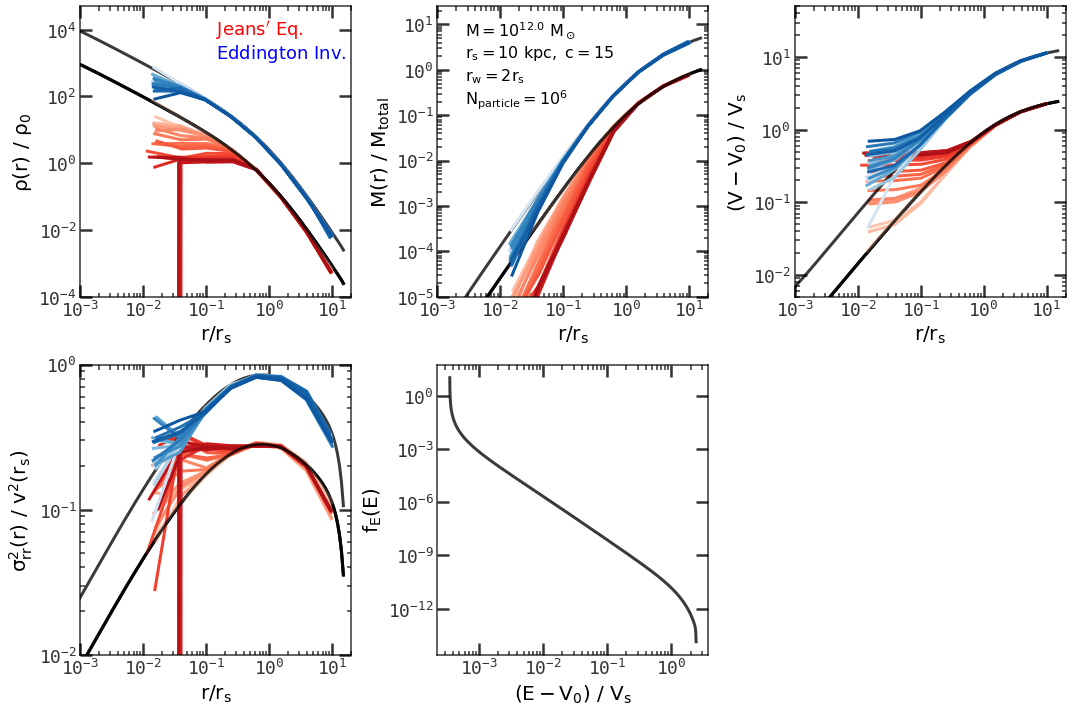

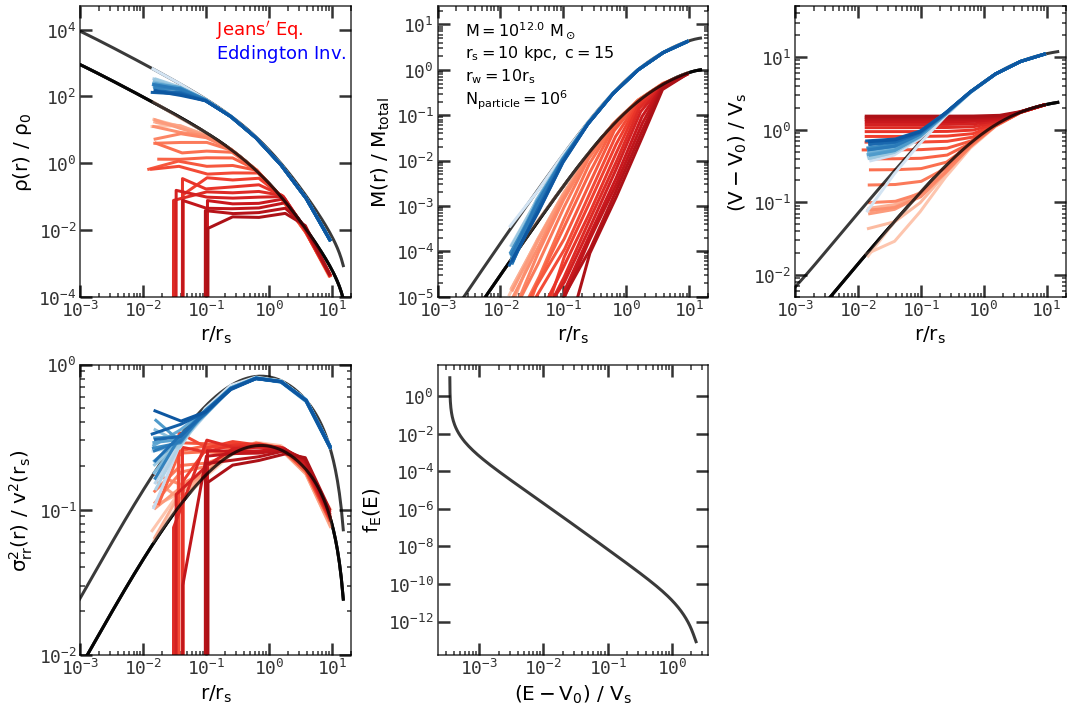

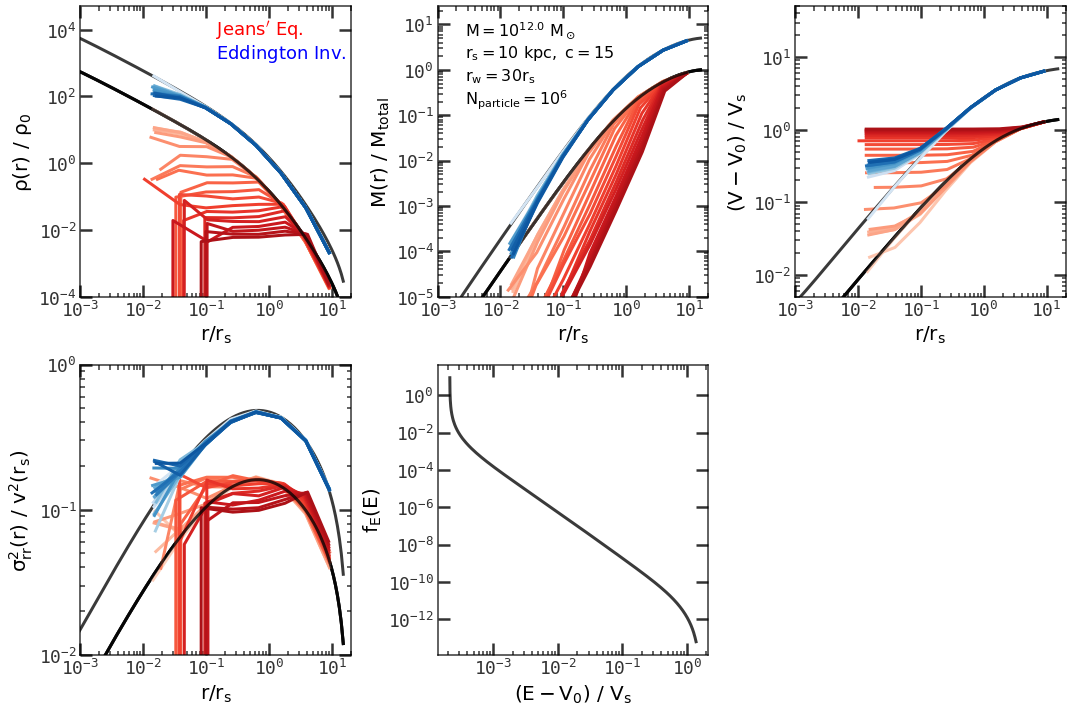

In [354]:
for ir in 0,1,2:

    _, axs = m_get_figure((15, 10), 2, 3)
    axs = axs[0] + axs[1]

    fbases = ['run_jeans_eq/run%d/output/snapshot'%ir, 'run_eddington_inv/run%d/output/snapshot'%ir]
    cs_seqs = [ cms.get_seq('Reds', 30), cms.get_seq('Blues', 30) ]

    lims = [[1.0e-4, 5.0e4], [1.0e-5, 2.5e1], [5.0e-3, 0.5e2], [0.01, 1.]]
    ylabs = [ r'$\rm \rho(r)\ /\ \rho_0$', r'$\rm M(r)\ /\ M_{total} $', 
            r'$\rm (V-V_0)\ /\ V_s $', r'$\rm \sigma_{rr}^2(r)\ /\ v^2(r_s) $' ]
    mlabs = [r"$\rm Jeans'\ Eq.$", r'$\rm Eddington\ Inv.$']
    labs_r = [r'r_w=2r_s',r'r_w=10r_s',r'r_w=30r_s']


    for ifbase, fbase in enumerate(fbases):
        offs = [ 1.0e1, 0.5e1, 0.5e1, 0.3e1, 1.0e2 ] if ifbase == 1 else [ 1. ]*5

        cs_seq = cs_seqs[ifbase]
        pf = nfws[ir]

        x1, x2 = pf['x0'], pf['xvir']
        rs, vel_s, Vs, V0 = pf['rs'], np.sqrt(pf['Vs']), pf['Vs'], pf['V0']
        mass, rho0 = pf['mass'], pf['rho0']

        # theory
        r = np.logspace( np.log10(x1), np.log10(x2), 200) * rs
        rho = pf.rho( r ) / rho0
        M = pf.M( r ) / mass
        V = (pf.V( r ) - V0) / Vs
        sigma2 = pf.sigma2( r ) / vel_s**2
        fE = pf.fE( pf.V(r) )

        for i,d in enumerate([rho, M, V, sigma2]):
            ax = axs[i]
            ax.plot( r/rs, np.abs(d)*offs[i], c=mycms2_r[0], lw=3. )
            m_set_lim(ax, [1.0e-3, 20], lims[i])
        if ifbase == 0:
            axs[4].plot( V, fE*offs[-1], c=mycms2_r[0], lw=3. )

        for i,d in enumerate([rho, M, V, sigma2]):
            ax = axs[i]
            ax.plot( r/rs, np.abs(d), c=mycms2_r[0], lw=3. )
            m_set_lim(ax, [1.0e-3, 20], lims[i])
            m_set_label(ax, r'$\rm r/r_s$', ylabs[i])    
        m_set_label(axs[4], r'$\rm (E-V_0)\ /\ V_s$', r'$\rm f_E(E)$')


        for ax in axs:
            m_set_scale(ax,'log', 'log')
        axs[5].set_axis_off()

        for i in range(0, 42, 2):
            ic = i//2
            with h5py.File(fbase + '_%0.3d.hdf5'%i, 'r') as f:
                x = f['PartType1/Coordinates'][:]
                v = f['PartType1/Velocities'][:]
                m = mass / len(x)
                st = SnapMeasure(x, v, pf)
                r = st['rval'] / rs
                rho = st['rho'] / rho0
                M = st['M'] / mass
                V_th = (pf.V( r[-1]*rs ) - V0)/Vs
                V = (st['V'] - V0 ) / Vs
                V = V + V_th - V[-1]
                s2 = st['sigma2'] / 3. / vel_s**2
                sel = r > 1.0e-2
            axs[0].plot( r[sel], rho[sel]*offs[0], c=cs_seq[ic+5] )
            axs[1].plot( r[sel], M[sel]*offs[1], c=cs_seq[ic+5])
            axs[2].plot( r[sel], V[sel]*offs[2], c=cs_seq[ic+5] )
            axs[3].plot( r[sel], s2[sel]*offs[3], c=cs_seq[ic+5] )

    txposs( axs[1], [ r'$\rm M=10^{12.0}\ M_\odot$', 
                    r'$\rm r_s=10\ kpc,\ c=15$', r'$\rm %s$'%( labs_r[ir] ),
                    r'$\rm N_{particle}=10^6$'], (.1, .92), (0. -.08), 'k' )
    txposs( axs[0], mlabs, (.5, .92), (0., -.08), ['r','b'], 18 )

    plt.tight_layout()
    plt.savefig('output/profile_recipe_sim_r%d.pdf'%ir )
    plt.show()

/home/yangyao/soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide


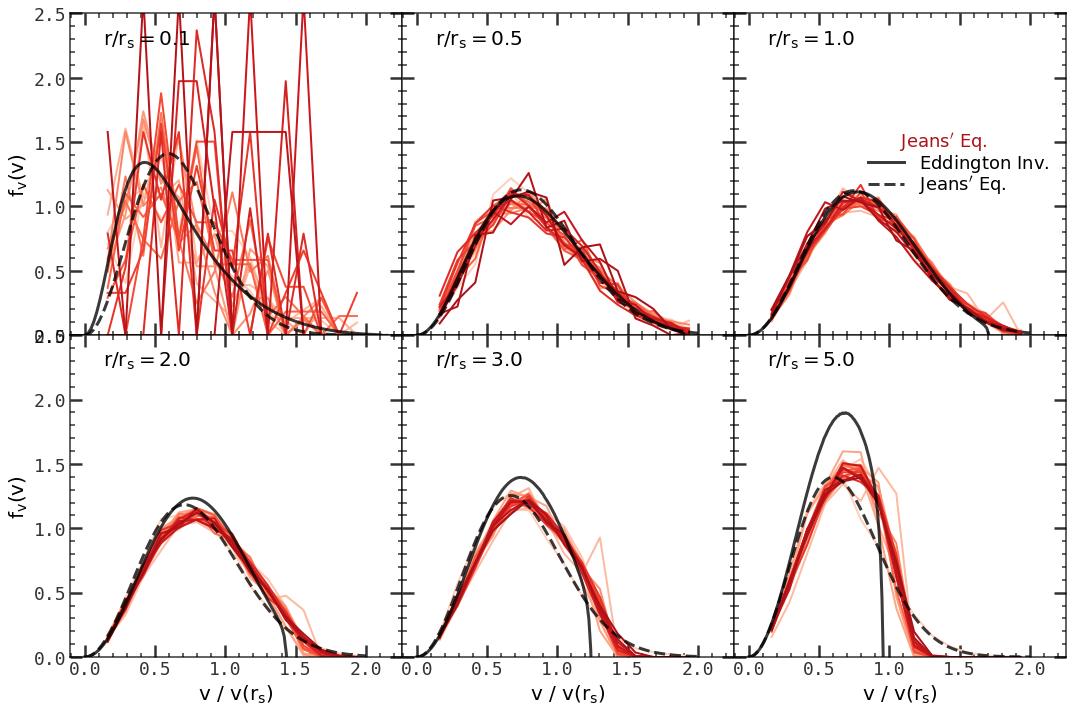

In [ ]:
fbases = [ 'run_jeans_eq/output/snapshot', 'run_eddington_inv/output/snapshot' ]
cs_seq = cms.get_seq('Reds', 30)
ofname = ['jeans', 'edd']
labname = [r"Jeans'\ Eq.", r"Eddington\ Inv."]

for ifbase, fbase in enumerate(fbases):

    pf = nfw

    fig, axs = plt.subplots( 2, 3, figsize=(15,10), sharey=True, sharex=True, gridspec_kw={'wspace':0., 'hspace':0.} )
    axs = axs.flat

    eddinv = EddInv(pf)
    vs = np.sqrt( pf.Vs )
    xrs = np.array([0.1, 0.5, 1, 2, 3., 5.])

    for i in range(21):
        with h5py.File(fbase + '_%0.3d.hdf5'%i, 'r') as f:
            x = f['PartType1/Coordinates'][:]
            v = f['PartType1/Velocities'][:]
            m = pf.mass / len(x)
            r,e,h = SnapMeasure(x,v,pf).find_vprof( radii=xrs, v_range=(.1, 2.) )
        for ir, xr in enumerate(xrs):
            axs[ir].plot( e[ir], h[ir], c=cs_seq[i+5], lw=2. )

    txpos(axs[2], r'$\rm %s$'%(labname[ifbase]), (.5, .6), cs_seq[-5], 18)
    for ir, xr in enumerate(xrs):
        ax = axs[ir]

        r = pf.rs * xr
        V = pf.V( r )
        vmax = eddinv.vmax( V )
        v = np.linspace( 0., vmax, 100 )
        fE = pf.fE( V + 0.5*v*v )*4.0*np.pi*v*v
        fE /= fE.sum()*(vmax/100/vs)
        ax.plot( v/vs, fE, c=mycms2[-1], lw=3., label=r'$\rm Eddington\ Inv.$' )

        sigma = np.sqrt(pf.sigma2( r ))
        v = np.linspace( 0., 2.0*vs, 100 )
        rv = stats.norm(scale=sigma)
        fE = rv.pdf( v )*4.0*np.pi*v*v
        fE /= fE.sum()*(2.0*vs/100/vs)
        ax.plot( v/vs, fE, c=mycms2[-1], lw=3., ls='--', label=r"$\rm Jeans'\ Eq.$" )
        
        m_set_label(ax, r'$\rm v\ /\ v(r_s)$')
        m_set_label(ax, y=r'$\rm f_v(v)$')
        ax.label_outer()
        txpos(ax, r'$\rm r/r_s=%.1f$'%xr, (.1, .92), 'k', 20)

    m_set_lim(axs[0], y=[0., 2.5])
    axs[2].legend(loc='center right', frameon=False, labelspacing=0., fontsize=18)

    plt.tight_layout()
    plt.savefig('output/compare_recipe_sim_vprofile_%s.pdf'%( ofname[ifbase] ))
    plt.show()

## Effect of the Opening Criteria

In [11]:
for i in range(9):
    for j in range(10):
        os.system( 'mkdir -p open_crit/runs_alpha%d.%d/output'%( i, j ) )

In [ ]:
fbase = './open_crit/ICs/IC_N50000_M12'
n = 50000
for i in range(10):
    pos, vel, mass = JeansIC( nfw ).get(n)
    print( pos[0], vel[0], m )
    IC_generator( fbase + '.%d.hdf5'%i, pos, vel, mass )

In [12]:
tbegin = 0.
tsnap = 5.0
tmax = 5.01
angle = 0.2
finit_base = '../ICs/IC_N50000_M12'
alphas = [ 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5 ]

pfile = Gadget2Param()

pfile.set( 'TimeOfFirstSnapshot', tbegin )
pfile.set( 'TimeBetSnapshot', tsnap )
pfile.set( 'TimeMax', tmax )
pfile.set( 'ErrTolTheta', angle )
for ialpha, alpha in enumerate(alphas):
    for j in range(10):
        finit = finit_base + '.%d'%j
        pfile.set('InitCondFile', finit)
        pfile.set('ErrTolForceAcc', alpha)
        pfile.dump( 'open_crit/runs_alpha%d.%d/param.txt'%( ialpha, j) )

In [24]:
def hms2s(s):
    hms = [ int(i) for i in s.strip('\n').split(':') ]
    return hms[0] * 3600 + hms[1] * 60  + hms[2]
def hms2h(s):
    return hms2s(s) / 3600.0

def find_xvt( filebase, ialpha, j, nfiles=3 ):
    filepath = filebase +  '%d.%d'%( ialpha, j )
    stats = DumpedSets( filepath + '/output/', nfiles ).stats
    x, v = stats['x'][-2], stats['v'][-2]

    path = os.popen( 'ls ' + filepath + '.*' ).read().strip('\n')
    with open( path, 'r' ) as f:
        l = f.readlines()
        t1 = hms2h(l[0])
        t2 = hms2h(l[-1])
        dt = t2-t1
    return x,v,dt
def find_xvt_s( filebase, nalpha, nj1, nj2, nfiles=3 ):
    xvts = np.array([ find_xvt(filebase, ialpha, j) \
                     for ialpha in range(nalpha) for j in range(nj1, nj2) ], dtype=float)
    x,v,t = xvts.T
    x = x.reshape((nalpha, nj2-nj1))
    v = v.reshape(x.shape)
    t = t.reshape(x.shape)
    return x,v,t

In [25]:
x,v,t = find_xvt_s('open_crit/runs_alpha', 9, 0, 10)
t[0,0] = t[0,1:].mean()
t[4,1] = t[4,2:].mean()
t *= 16

x, xe = x.mean(1), x.std(1)
v, ve = v.mean(1), v.std(1)
t, te = t.mean(1), t.std(1)

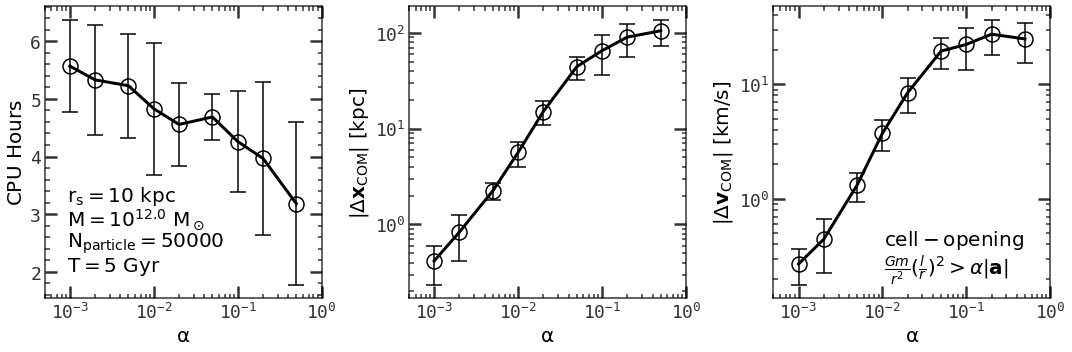

In [28]:
fig, axs = plt.subplots( 1, 3, figsize=(15, 5) )
axs = axs.flat

ylabs = [r'CPU\ Hours', r'|\Delta {\bf x}_{COM}|\ [kpc]', r'|\Delta {\bf v}_{COM}|\ [km/s]']
for i, (d, de) in enumerate( zip([t,x,v], [te,xe,ve]) ):
    ax = axs[i]
    ax.errorbar( alphas, d, yerr=de, c='k', capthick=.5, capsize=8, elinewidth=1.5,
        lw=3., fmt='-o', markersize=15, markerfacecolor='none', markeredgewidth=1.5 )
    m_set_label(ax, r'$\rm \alpha$', r'$\rm %s$'%( ylabs[i] ), fontsize=20)
    m_set_lim(ax, [5.0e-4, 1.0])
    
txposs( axs[2], [ r'$\rm cell-opening$', r'$ \frac{Gm}{r^2}(\frac{l}{r})^2 > \alpha|{\bf a}|$' ],
       (.4, .2), (0., -.1), 'k', 20)
txposs( axs[0], [r'$\rm r_s=10\ kpc$', r'$\rm M=10^{12.0}\ M_\odot$', \
        r'$\rm N_{particle}=50000$', r'$\rm T=5\ Gyr$'], (.08, .35), (0. -.08), 'k', 20 )
    
for ax in axs:
    m_set_scale(ax, x='log')
for ax in axs[1:]:
    m_set_scale(ax, y='log')
    
plt.tight_layout()
plt.savefig('output/open_crit.pdf')
plt.show()